### Name - Abhishek Bawa
### Roll No - 101903759
### Group - 4CO29

# I have used Light Gradient Boosting Machine for solving the time series prediction problem

## Declaration and Preprocessing

In [192]:
# Import Section
import random
import math
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [193]:
# Read and print the excel file
df = pd.read_excel('../input/timeseries/DATASET.xlsx')
df.head()

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [194]:
#Remove anomolies of sections
clear_idx = 910
lst_to_clear = []
for i in range(9):
  lst_to_clear.append(clear_idx+i)
print(lst_to_clear)
df.fillna(0, inplace=True)
df.drop(lst_to_clear, inplace = True)

[910, 911, 912, 913, 914, 915, 916, 917, 918]


In [195]:
# Rename column to section_name
df.columns = df.columns.str.replace('Unnamed: 0', 'Section_name')

In [196]:
# Naming sections 
mul = 10
j = 0
for i in range(100):
  sec_name = df.iloc[j,0]
  df.iloc[j:j + mul, 0] = sec_name
  j += mul
test_frame = df.loc[df['year'] == 10]
df.head()

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,0.0,0.0,0.0,0,1.52
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,0.0,3.4,0.0,0,1.62
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,0.0,21.3,0.0,4,1.68
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,0.0,21.3,0.0,5,1.78
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,0.0,23.9,0.0,7,1.80


In [197]:
df.tail(15)

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
994,Sec_100,6,662.0,1251.4,11.2,254.8,27,117,3194,1303,71.5,89.9,95.0,10,1.794
995,Sec_100,7,662.0,1157.2,11.7,158.7,19,119,3226,1316,89.9,172.1,113.0,11,1.947
996,Sec_100,8,662.0,1844.3,10.8,209.0,38,113,3258,1330,109.8,222.3,144.0,12,1.993
997,Sec_100,9,662.0,1285.8,11.3,85.5,30,111,3291,1343,140.8,292.8,167.0,12,2.122
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212
999,Sec_101,1,454.0,1446.2,13.6,69.3,23,119,2156,509,0.0,0.0,0.0,2,1.466
1000,Sec_101,2,454.0,1366.8,12.7,152.0,19,116,2223,525,0.0,0.0,0.0,2,1.492
1001,Sec_101,3,454.0,1310.5,13.3,57.9,17,114,2634,595,0.0,0.0,0.0,4,1.597
1002,Sec_101,4,454.0,1128.7,15.0,28.0,12,121,3842,730,0.0,0.0,0.0,15,1.634
1003,Sec_101,5,454.0,1126.6,14.4,28.8,16,116,3842,730,19.0,0.0,0.0,15,1.654


In [198]:
test_frame

,Section_name,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,Para-9,Para-10,Para-11,Para-12,Para-13
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,16.8,105.0,65.0,9,1.960
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,76.5,44.3,5.0,9,0.795
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,78.5,0.0,0.0,16,1.432
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,28.5,60.5,67.0,11,2.004
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,0.0,276.2,34.0,6,1.792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,219.7,206.2,10.0,8,1.607
978,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,5.9,74.5,33.0,13,1.087
988,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,131.4,72.4,18.0,12,0.996
998,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,193.7,305.6,180.0,12,2.212


# Training and Testing
## Define the Light Gradient Boosting Machine

In [199]:
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=19)

## Extract the test and training dataset for each section

In [200]:
# Extract the training part of input dataset
move = 9
def extract_xtrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, 1:10]

In [201]:
# Extract the training part of output dataset
def extract_ytrain(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_start:row_end, col_start]

In [202]:
# Extract the testing part of input dataset
def extract_xtest(df, row_start):
  row_end = row_start + move
  return df.iloc[row_end, 1:10].to_numpy()

In [203]:
# Extract the output part of ouput dataset
def extract_ytest(df, row_start, col_start):
  row_end = row_start + move
  return df.iloc[row_end, col_start]

In [204]:
# function to calcuate mean square error
def calcuate_lmse(predict_val, test_val):
  pred_diff = predict_val - test_val
  return (pred_diff)**2

In [205]:
# Get the XY Split
column_name = ["Para-"+str(i) for i in range(9,14)]
XY = []
def getXYsplit(df, row_start, row_end):
  XY = []
  XY.append(extract_xtrain(df, row_start, row_end))
  XY.append(extract_ytrain(df, row_start, row_end))
  XY.append(extract_xtest(df,row_start))
  XY.append(extract_ytest(df,row_start,row_end))
  return XY

In [206]:
# Create a dictionary for storing predicted and true values
from collections import defaultdict
pred_values = defaultdict(lambda : [])

In [207]:
from sklearn.metrics import mean_squared_error
target_col = [10,11,12,13,14]
root_mean_square_error = []
total_count = 0
curr_section = 0
total_squared_error = 0
max_val = 1000
for j in target_col:
  l_count = 0
  for i in range(0, max_val, 10):
    LXY = getXYsplit(df,i,j)
    x_train, y_train,x_test,y_test = LXY[0],LXY[1],LXY[2],LXY[3]

    # fit the model and predict
    model.fit(x_train, y_train)
    ypred = model.predict(x_test.reshape(1,-1))[0]

    # store the predicted values
    pred_values[column_name[curr_section]].append(ypred)
    
    # store squared difference for RMSE
    total_squared_error = calcuate_lmse(ypred, y_test) + total_squared_error
    l_count += 1
    total_count += 1

  # root_mean_square_error.append(local_squared_error)
  curr_section += 1
predicted_df = pd.DataFrame.from_dict(pred_values)

In [208]:
# Calculate  RMSE
total_rmse_by_n = total_squared_error/total_count
final_rmse = total_rmse_by_n**0.5

print("RMSE is " + str(final_rmse))

RMSE is 68.76256275509705


# Plot

In [185]:
predicted_df

,Para-9,Para-10,Para-11,Para-12,Para-13
0,0.577778,25.922222,6.333333,5.111111,1.764444
1,22.877778,13.411111,0.222222,4.000000,0.759778
2,39.577778,0.000000,0.000000,9.333333,1.273889
3,5.477778,28.455555,29.111111,5.777778,1.571111
4,0.000000,198.699999,31.555556,4.444444,1.285556
...,...,...,...,...,...
95,85.499999,152.244445,5.666667,6.000000,1.372556
96,1.111111,33.077778,14.888889,10.777778,1.045478
97,50.544444,39.400000,7.888889,9.333333,0.727333
98,59.977779,93.055555,81.333333,8.444444,1.831667


In [209]:
# Get random rows for plotting
plot_row = 50
random_rows = []
for i in range(plot_row):
  random_rows.append(random.randint(0,90))


## Plot for Para-9

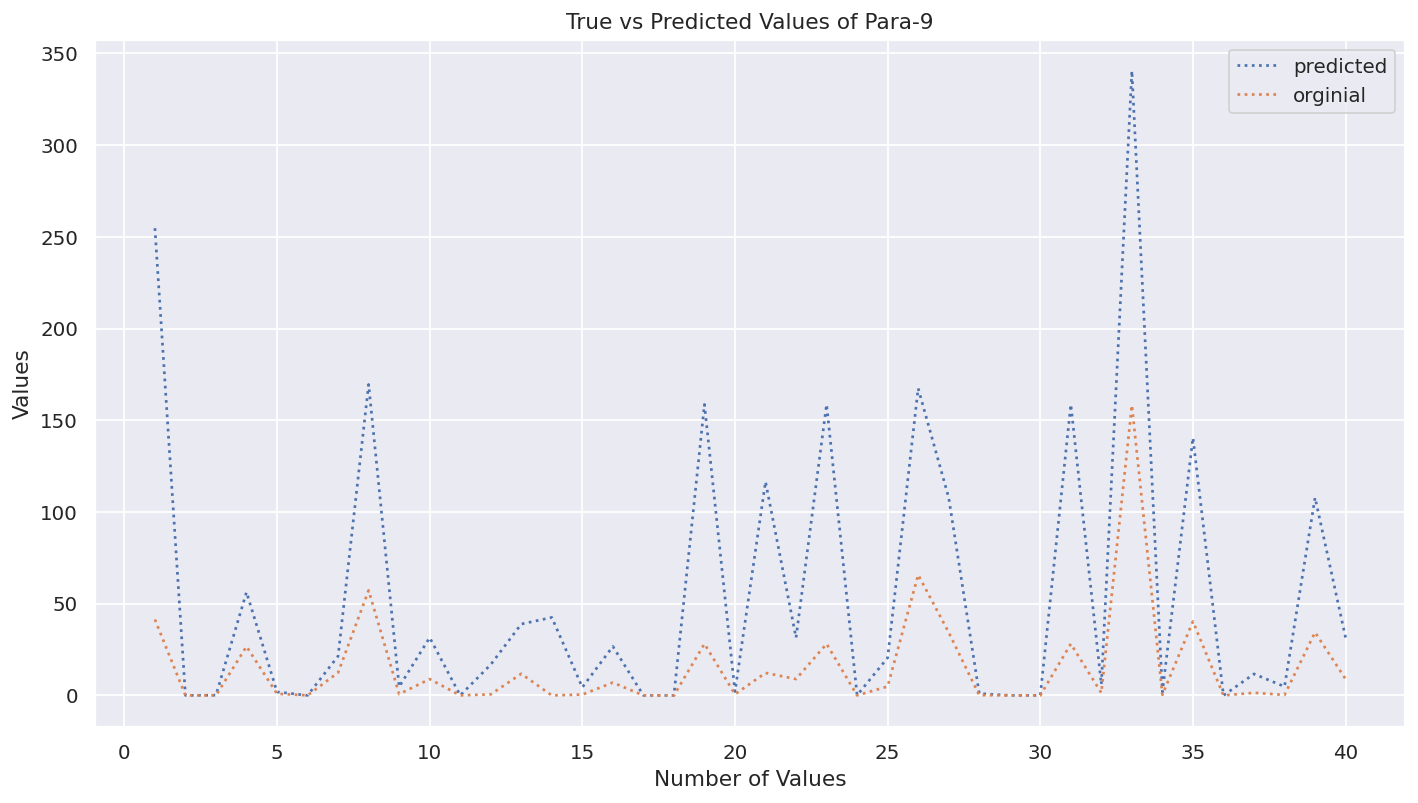

In [187]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 0]
predicted_value = test_frame.iloc[random_rows,10]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-9')
plt.legend(loc = 'upper right')

## Plot for Para-10

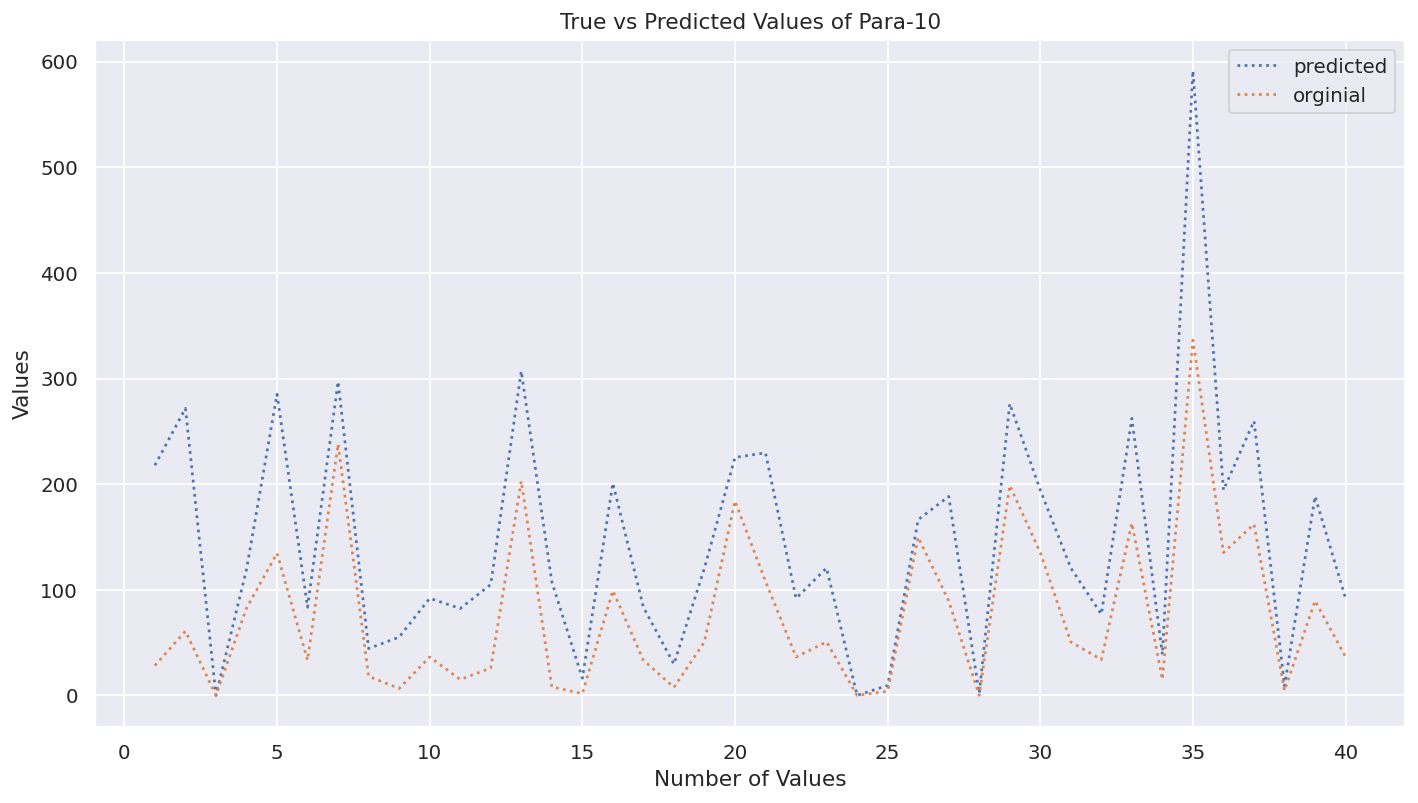

In [188]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 1]
predicted_value = test_frame.iloc[random_rows,11]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-10')
plt.legend(loc = 'upper right')

## Plot for Para-11

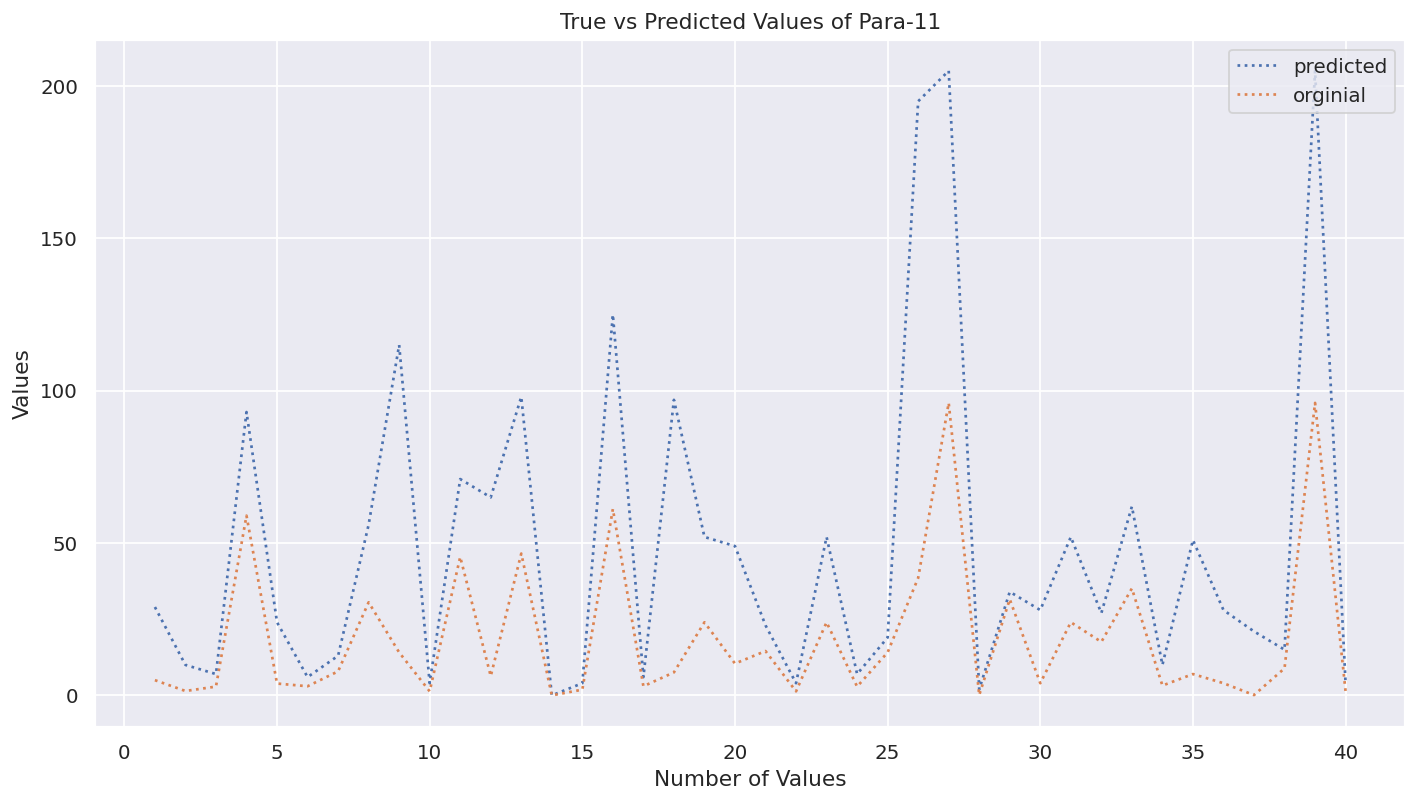

In [189]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 2]
predicted_value = test_frame.iloc[random_rows,12]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-11')
plt.legend(loc = 'upper right')

## Plot for Para-12

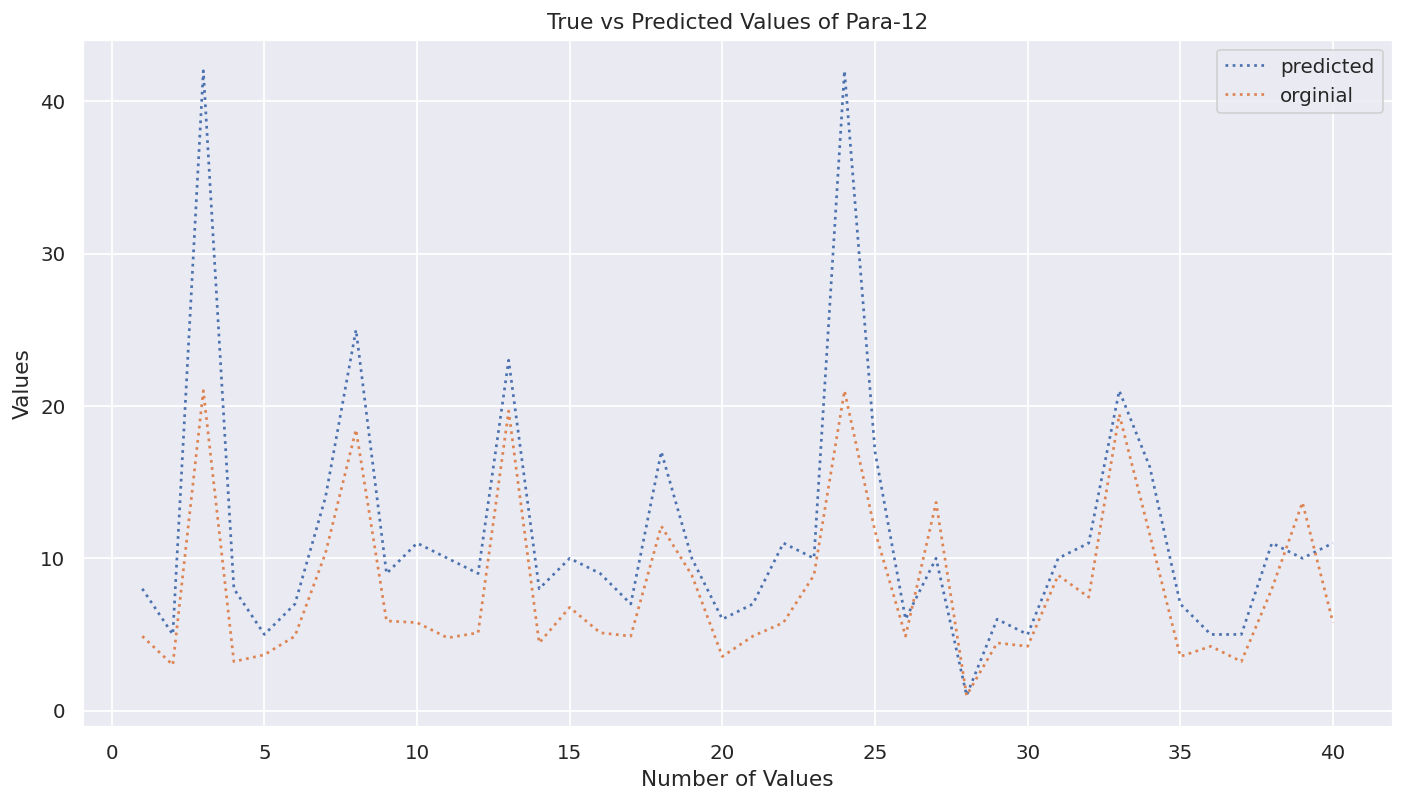

In [190]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 3]
predicted_value = test_frame.iloc[random_rows,13]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-12')
plt.legend(loc = 'upper right')

## Plot for Para-13

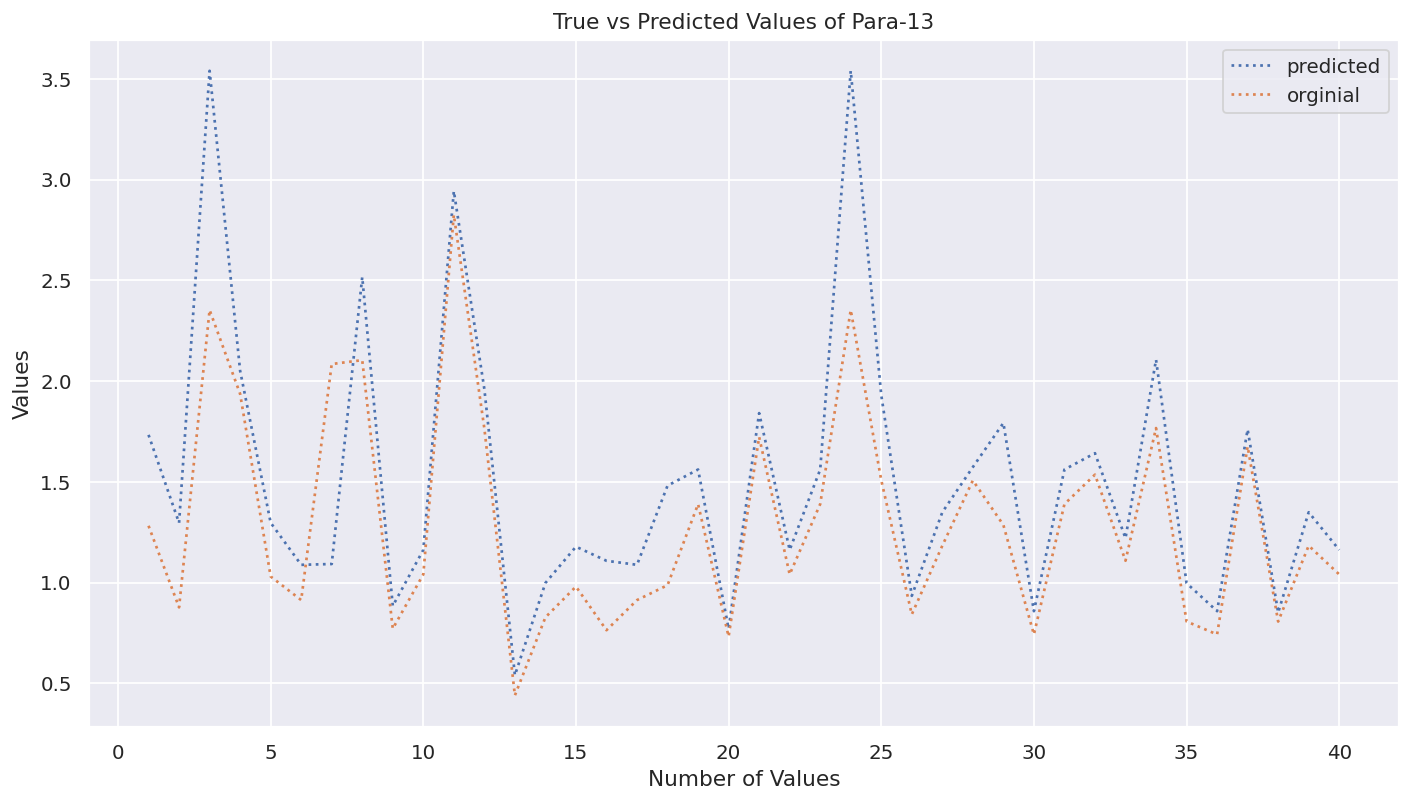

In [191]:
figure(figsize=(13, 7), dpi=130)
true_value = predicted_df.iloc[random_rows, 4]
predicted_value = test_frame.iloc[random_rows,14]
x_value = []
for i in range(len(true_value)):
  x_value.append(i+1)
plt.plot(x_value,predicted_value, linestyle = 'dotted', label = 'predicted')
plt.plot(x_value,true_value, linestyle = 'dotted', label = 'orginial')
plt.xlabel('Number of Values')
plt.ylabel('Values')
plt.title('True vs Predicted Values of Para-13')
plt.legend(loc = 'upper right')